In [52]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Градиентный спуск

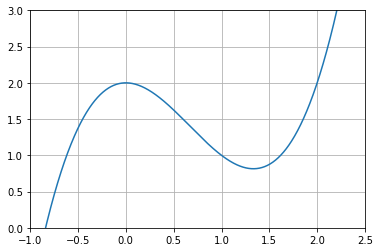

In [53]:
f = lambda x: x**3-2*x**2+2
x = np.linspace(-1,2.5,1000) #функция берет х от -1 до 2,5 и ставит 1000 точек
plt.plot(x,f(x)) #строим график от х и от f(x)
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.grid()# делает сетку 
plt.show()

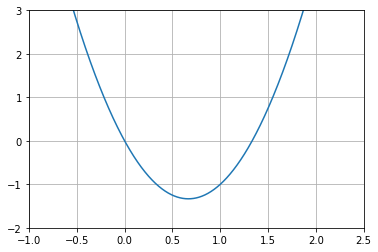

In [4]:
f_prime = lambda x: 3*x**2-4*x #определяем производную для ф-ии x**3-2*x**2+2
x = np.linspace(-1,2.5,1000)
plt.plot(x,f_prime(x))
plt.xlim([-1,2.5])
plt.grid()# делает сетку 
plt.ylim([-2,3])
plt.show()
#строим нашу производную

## Метод градиентного спуска

In [54]:
#Нужно начать с какой-то точки.
lr = 0.1 #learning rate (шаг)
points = [2] #Начнем с точки 2
n_epochs = 15 # будем делать 15 шагов

In [55]:
for _ in range(n_epochs): #Циклом берем 15 значений
    cur_point = points[-1] #В качестве текущей точки мы берем последнюю точку, которая есть в списке у нас points
    #Тк в первом шаге есть только точка 2, то она и будет использоваться
    grad = f_prime(cur_point) #Считаем произодную для этой точки (2). Мы получаем градиенты
    new_point = cur_point - lr * grad #Градиент умножаем на шаг и вычитаем из текущей точки (2)
    points.append(new_point) #Получаем новую точку. Ее заносим в список точек и идем на следующую эпоху (шаг)

In [10]:
y_points = [f(p) for p in points]
# Когда мы нашли все точки,мы спустились, прошло 15 эпох, мы для всех этих точек найдем значение функции
#чтобы красиво построить на графике

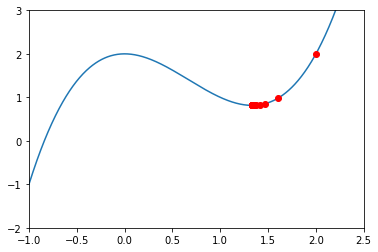

In [14]:
plt.plot(x,f(x)) #Построим саму функцию нашу
plt.plot(points, y_points, 'ro') #Построим точки (points) по которым шагали с помощью градиентного спуска и значение функции (y_points), 
#которое у нас было в этих точках 
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

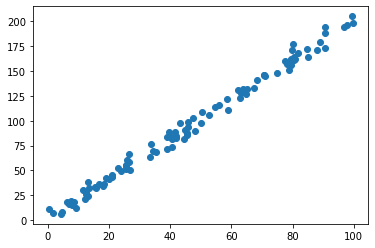

In [72]:
N = 100 #Сздадим выборку из 100 точке
X = np.random.uniform(low=0, high=100, size=N) #Получим их случайным образом из нормального распределения
Y = 2*X + 1 + np.random.normal(scale=5, size=N) # Построим функцию 2*X + 1  и плюс случайный шум

plt.scatter(X, Y)
plt.show()

<img src="gradientdescentofmsetable.png"/>

## Применим метод градиентного спуска

In [61]:
EPOCHS = 20 # будем использовать 20 этох
LEARNING_RATE = 0.0001  # шаг

In [62]:
def cost_function(X, y, theta0, theta1): # делаем ф-ю потерь
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2 #Считаеются общие потери, накапливаются ошибки модели 
    return total_cost / (2 * len(X)) # Усредняем общие потери (накопленные ошибки модели) 

In [63]:
def der_theta0(X, y, theta0, theta1): #Производная theta0
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [64]:
def der_theta1(X, y, theta0, theta1): #Производная theta1.
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i] #Отличаются только  X[i] этим иксом 
    return total_cost / (len(X))  

In [73]:
# Мы знаем наши производные, поэтому можем начать обучать нашу ф-я
# Начнем с параметров theta0 = 1 и theta1 = 1. 
# Наша ф-я это 2х + 1. Один из параметров мы угадали тут сразу
theta0 = 1
theta1 = 1
for _ in range(EPOCHS): #Заходим в наши эпохи
    dt0 = der_theta0(X, Y, theta0, theta1) #считаем производные по ф-и выше которую задали
    dt1 = der_theta1(X, Y, theta0, theta1) #считаем производные по ф-и выше которую задали
    
    theta0 = theta0 - LEARNING_RATE * dt0 #обновляем значение theta0
    theta1 -= LEARNING_RATE * dt1 #обновляем значение theta1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1)) 
    #cost_function(X, Y, theta0, theta1) - чтоыб вывести ф-ю потерь
    
    
    """
    Мы видим, что Т0 всегда оставалось около 1, так как функция 2x + 1 и вот из-за +1 (но не уверен)
    , а Т1 прям на первом шаге реском скакануло 1.32 
    и потом быстро стало расти и потом стало около 2 где-то находится и не переваливаться сильно за 2
    Значение ф-и потерь сильно упало, так как начинали с 759,6, а закончили 14,958
    """

t0: 1.0047406781444252 t1: 1.2985192025169943 cost: 768.83478963884
t0: 1.008099251790239 t1: 1.5093158315281157 cost: 389.67470331570877
t0: 1.0104818637733948 t1: 1.658167909545783 cost: 200.6118882092286
t0: 1.012175308411586 t1: 1.7632783684532574 cost: 106.33838559872045
t0: 1.0133821030789516 t1: 1.8375010541569494 cost: 59.33023143845437
t0: 1.0142452537009863 t1: 1.8899126008850902 cost: 35.89027400116552
t0: 1.0148657426986514 t1: 1.926922396887153 cost: 24.20226413211894
t0: 1.0153148779517305 t1: 1.9530563772949858 cost: 18.374196509589343
t0: 1.0156430129145282 t1: 1.9715104928016025 cost: 15.468106111289869
t0: 1.0158857042515859 t1: 1.9845415368727994 cost: 14.019018280738981
t0: 1.0160680599998961 t1: 1.9937431250666628 cost: 13.296444149671494
t0: 1.0162078099867602 t1: 2.0002405754884878 cost: 12.936135787723254


In [67]:
cost_function(X,Y,10,10) #Значение ф-и потерь для определенной точки (10,10)

115612.81638106279

In [74]:
#Теперь посторим это еще раз, чтобы красиво нарисовать 


# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

#Сохраним все в соответствующие списки 
costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

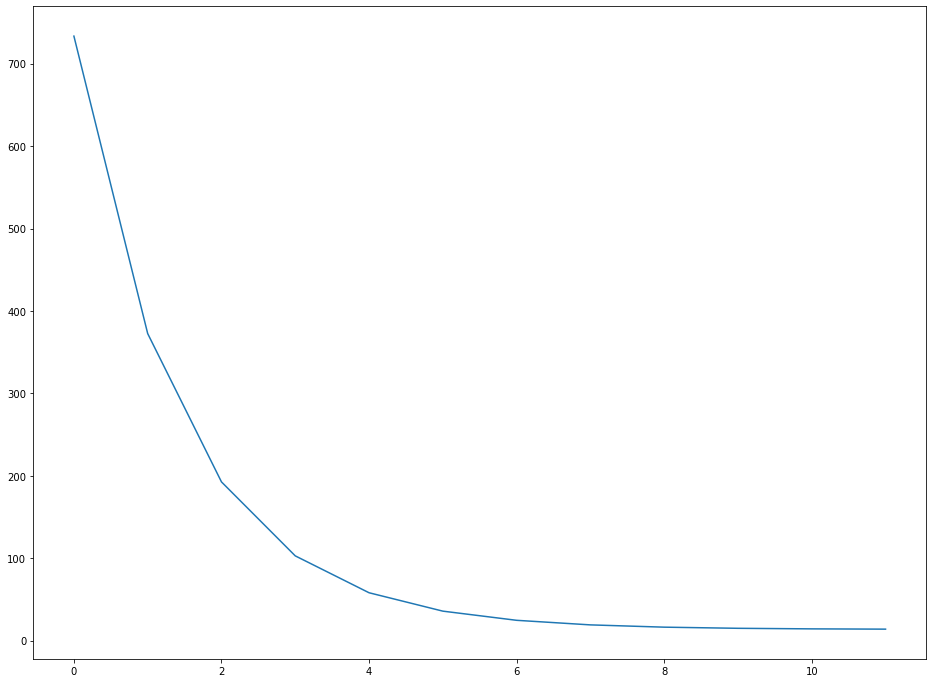

In [75]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

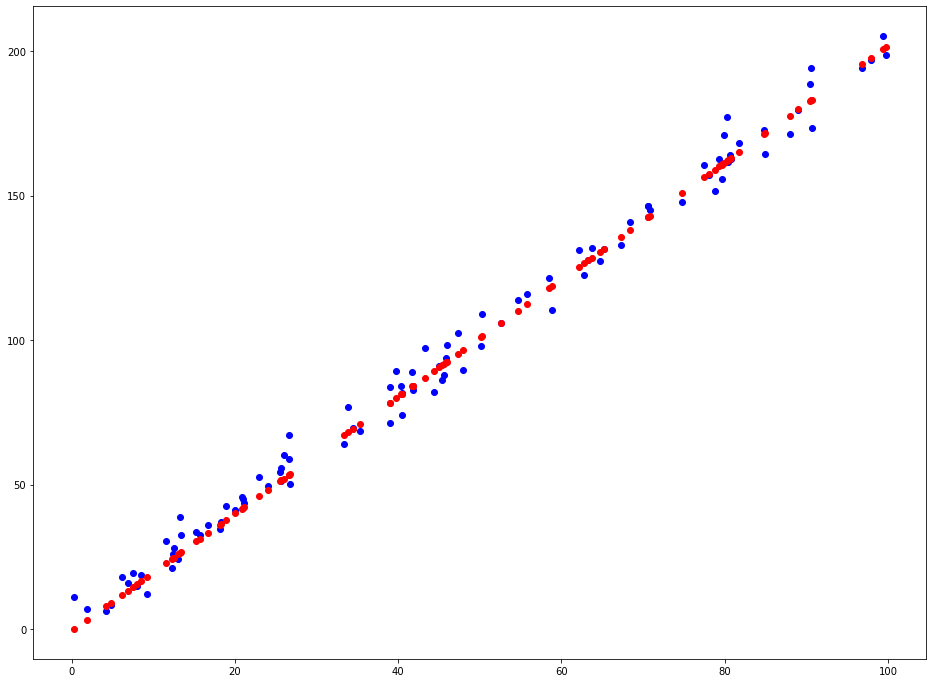

In [76]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[11], color='red') #предсказание на 11 шаге preds[11] (EPOCHS = 12 максимум 12, потому что мы указали столько)
#Если поставить 1, то видно, что на 1 шаге наша модель предсказывает очень плохо и красные точки вообще мимо
#C каждым шагом все лучше и лучше. Спускаемся к минимуму
plt.show()
# Синии точки это наши истинные значения
# Красные точки это наши предсказанные значения

In [77]:
params

array([-0.61122425,  2.0307388 ])

## Метод стохастического градиентного спуска

In [78]:
EPOCHS = 120
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    # Для статистики считаем общее предсказание и функцию потерь
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * (current_prediction - Y[i])
    params[1] -= LEARNING_RATE * ((current_prediction - Y[i]) * X[i])
"""
Отличние в том, что в обычном градиентном спуске мы считали предсказания для всех значений, то стохастическом 
мы считаем только по одному значению. Градиент будет считать только по 1 семплу 

predictions было и current_prediction стало

    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

"""

'\nОтличние в том, что в обычном градиентном спуске мы считали предсказания для всех значений, то стохастическом \nмы считаем только по одному значению. Градиент будет считать только по 1 семплу \n\npredictions было и current_prediction стало\n\n    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)\n    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    \n\n'

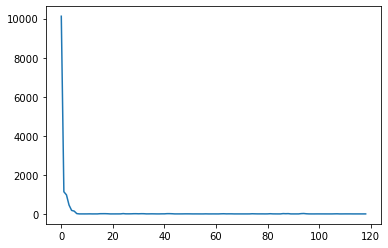

In [84]:
# Если посмотреть ф-ю потерь на 1 шаге, то она точно также как и градиентынй спуск падала
# [1:] первый шаг.
#Точно также наша модель обучалась неззависимо от того, что мы использовали всего 1 сэмпл 
plt.plot(costs[1:])
plt.show()

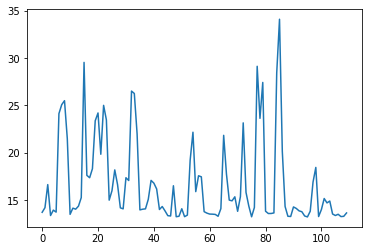

In [85]:
# Если посмотреть ф-ю потерь после 10 шага, то будет видно, что ф-я потерь сильно прыгает
# Это прявление того, что мы считаем каждый раз ошибку на разных семплах и на одних семплах мы ошибаемся
#гораздо меньше чем на других
# поэтому ошибка прыгает сильно 

plt.plot(costs[10:])
plt.show()

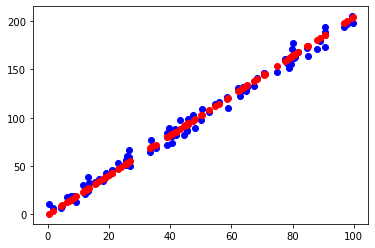

In [86]:
#Видим результат, что модель обучилась (т0 не обучается почему-то, нужно разобраться. т0 проходит через 0 все равно)
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

## Broyden-Fletcher-Goldfarb-Shanno algorithm (BFGS)

In [87]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [88]:
def square(X):
    return X[0]**2 + (X[1]+1)**2 # Можно любую ф-ю задать

phi_m = np.linspace(-2, 2, 100) #зададим значения
phi_p = np.linspace(-2, 2, 100)#зададим значения
X,Y = np.meshgrid(phi_p, phi_m) # посчитаем значения с помощью meshgrid
XY = np.hstack((X.reshape(-1, 1), Y.reshape(-1,1)))
Z = np.array([square(t) for t in XY]).reshape(X.shape)

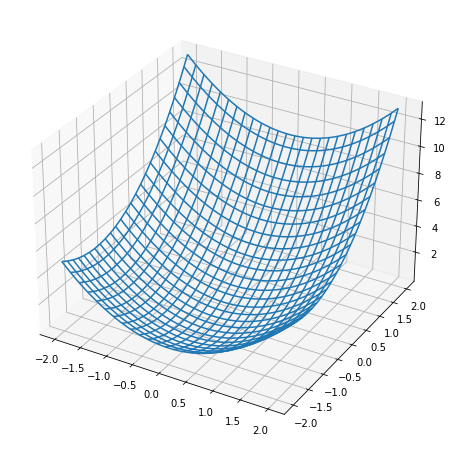

In [89]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
# Add a color bar which maps values to colors.

plt.show()

In [90]:
from scipy.optimize import minimize #позволяет минимизировать ф-ю

In [91]:
res = minimize(square, np.array((1,1)), method='BFGS')
#Записываем нашу ф-ю square и передаем ее в minimize. Он будет искать минимум ф-и нашей
#np.array((1,1)) задаем стартовую точку
#и метод method='BFGS'

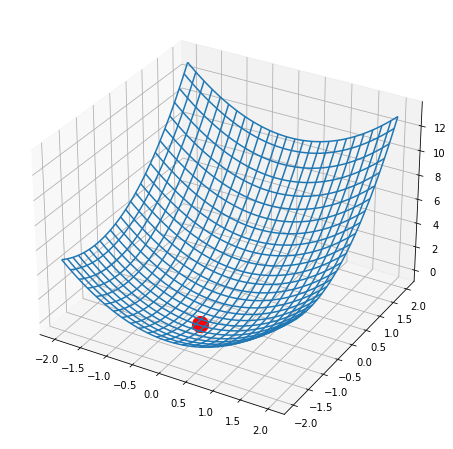

In [92]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
ax.scatter(res.x[0].reshape(-1, 1), res.x[1].reshape(-1, 1), np.array([square(res.x)]).reshape(-1,1),
          c='red', s=256)
# x[0].reshape(-1, 1) берем позицию 1 и res.x[1].reshape(-1, 1) позицию 2 и рисуем там точку
#Эта точки и есть наш минимум 
plt.show()